### Chroma DB - Lab

In [5]:
import os
import chromadb
from chromadb.config import Settings

chroma_client = chromadb.HttpClient(host='localhost', port=8000)

# ANONYMIZED_TELEMETRY=False
# Settings(anonymized_telemetry=False)


In [7]:
collection = chroma_client.get_or_create_collection('chat_history')
print(collection)
print(collection.count())

name='chat_history' id=UUID('be26f287-bea1-419b-a1c5-536a37c12368') metadata=None tenant=None database=None
0


In [8]:
chroma_client.delete_collection('chat_history')

In [10]:
collection = chroma_client.get_or_create_collection(
    name='chat_history',
    metadata={"hnsw:space": "cosine"}
)
print(collection)

name='chat_history' id=UUID('53f652e0-b6ca-473f-9517-4c645bab23ef') metadata={'hnsw:space': 'cosine'} tenant=None database=None


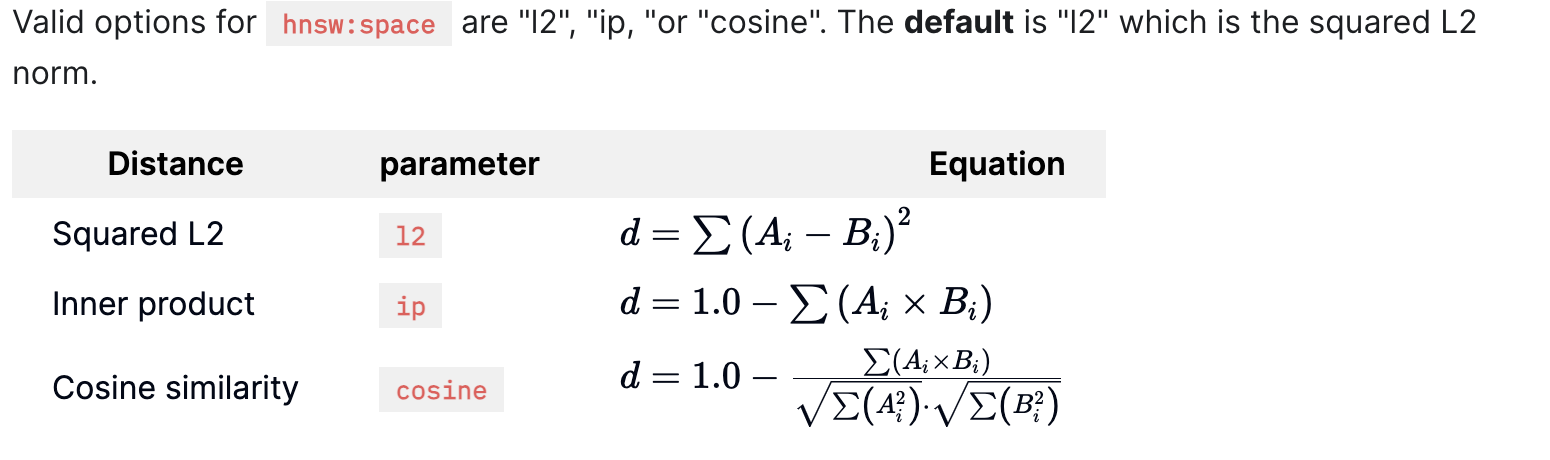

In [22]:
chroma_client.delete_collection(name='chat_history')

collection = chroma_client.get_or_create_collection(
    name='chat_history',
    metadata={"hnsw:space": "cosine"}
)

collection.add(
    documents=[
        'Michael has 20 apples, he shared 5 apples with Sofia, how many apples does Michael keep?',
        '15',
        # 'Sofia share 2 apples with her daughter, how many apples does Sofia keep?',
        # '',
        # "After that, Michael gives 1 apple to Sofia's daughter, how many apples does Michael have left?"
    ],
    metadatas=[
        {'role': 'user'},
        {'role': 'assistant'},
        # {'role': 'user'},
        # {'role': 'assistant'},
        # {'role': 'user'}
        # {'role': 'assistant'},
    ],
    ids=['id1', 'id2', ]
)

In [24]:
result = collection.query(
    query_texts=["Sofia share 2 apples with her daughter, how many apples does Sofia keep?"],
    n_results=2,
    where={
        'role': 'user' 
    }
)

print(result)

{'ids': [['id1', 'id2']], 'distances': [[0.17637089709080522, 0.746088991050845]], 'embeddings': None, 'metadatas': [[{'role': 'user'}, {'role': 'assistant'}]], 'documents': [['Michael has 20 apples, he shared 5 apples with Sofia, how many apples does Michael keep?', '15']], 'uris': None, 'data': None}
